In [2]:
from tensorflow import keras

!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

--2025-11-18 06:06:05--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras [following]
--2025-11-18 06:06:06--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4038273 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.keras’

best-cnn-model.kera 100%[===================>]   3.85M  --.-KB/s    in 0.07s   

2025-11-18 06:06:06 (56.6 MB/s) - ‘best-cnn-model.keras’ saved [4038273/4038273]



In [3]:
model = keras.models.load_model('best-cnn-model.keras')
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [4]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


-0.014383553 0.23351653


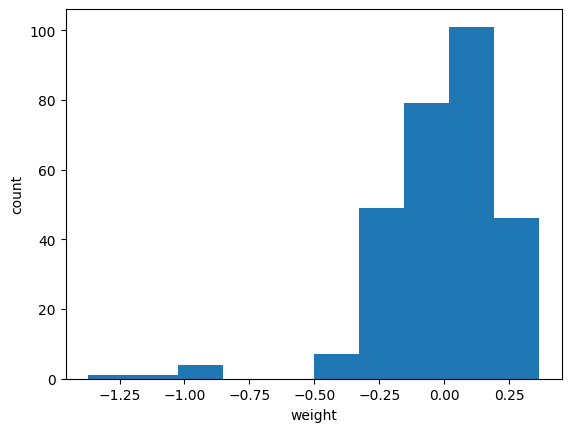

In [5]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show() # 0을 중심으로 종 모양

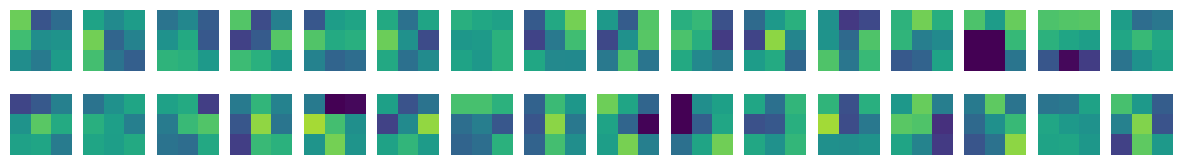

In [6]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        # imshow() : 배열에 있는 최댓값, 최솟값을 이용해 픽셀의 강도 표현
        axs[i, j].axis('off')

plt.show()

In [7]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


-0.00073018204 0.07836256


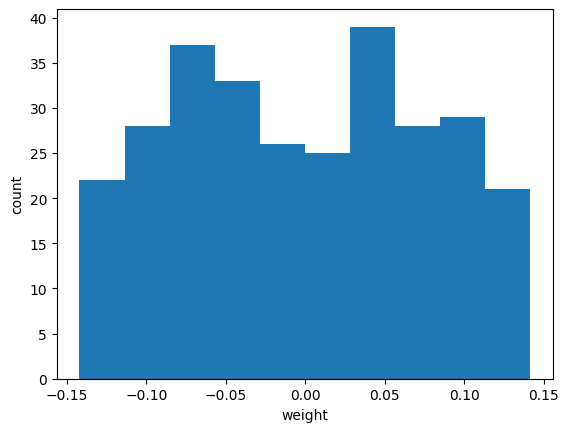

In [8]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show() # 대부분의 가중치가 -0.15~0.15 사이, 비교적 고른 분포

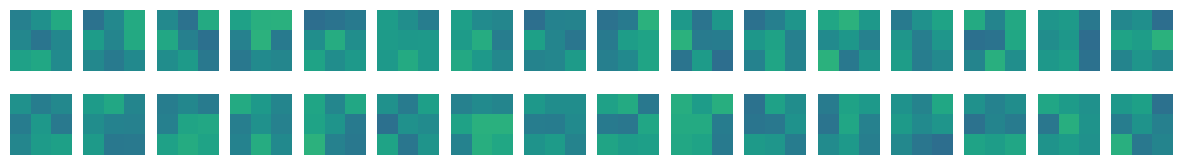

In [9]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show() # 가중치가 전체적으로 밋밋해짐 (색 차이 많이 x)

In [11]:
print(model.inputs)

conv_acti = keras.Model(model.inputs, model.layers[0].output)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


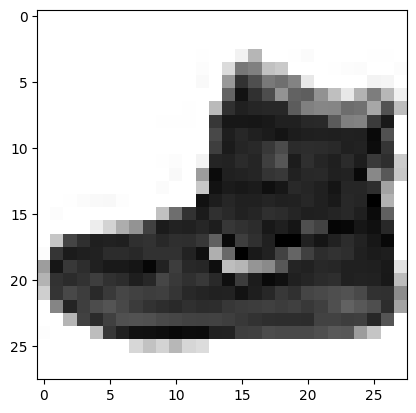

In [12]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [13]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
(1, 28, 28, 32)


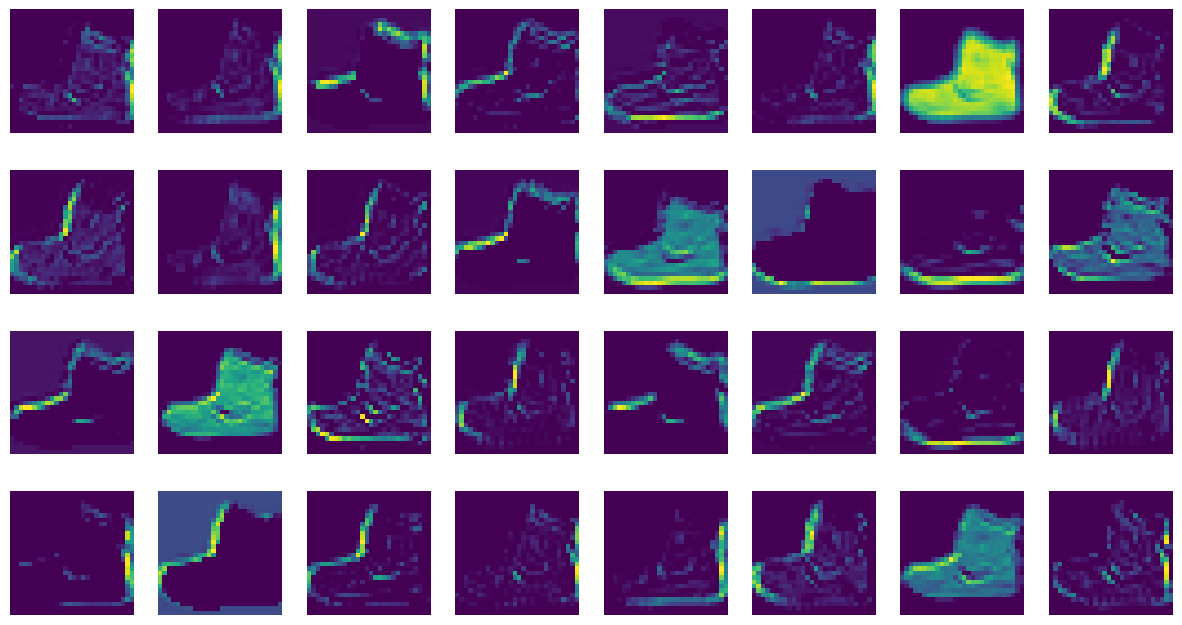

In [14]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [15]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
(1, 14, 14, 64)


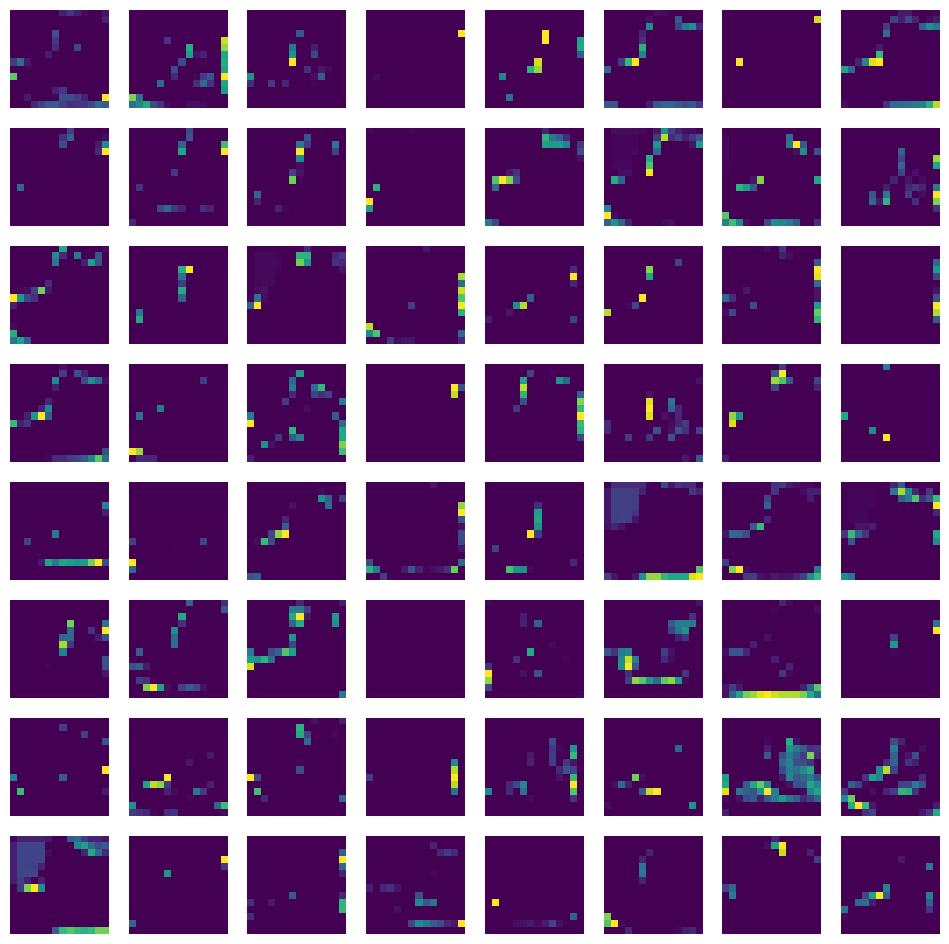

In [16]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show() # 합성곱 신경망 앞부분에 있는 합성곱 층은 이미지의 시작적인 정보를 감지
# 뒤쪽에 있는 합성곱 층은 감지한 시각적인 정보를 바탕으로 추상적인 정보 학습